# MODELLING, MACHINE LEARNING, FORECASTING

Instructor: Stefany



In [ ]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from numpy import array, average
from plotly.subplots import make_subplots
import random

(Based on a notebook by Anubhav Kumar Gupta, CSE AI-ML ENGINEERING STUDENT at RKGIT: https://www.kaggle.com/code/anubhavkumargupta/wine-quality-prediction-with-machine-learning
)

In [ ]:
# Load wine quality red data

link = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"

df_wine_quality_red = pd.read_csv(link)

In [ ]:
df_wine_quality_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Dataframe shape
df_wine_quality_red.shape

(1599, 12)

In [ ]:
# Computes a summary of statistics pertaining to the DataFrame columns
df_wine_quality_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Prints information about the DataFrame
df_wine_quality_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Returns the number of NaN values in all columns of a pandas DataFrame
df_wine_quality_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Dataframe columns
df_wine_quality_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Remove duplicate rows from DataFrame
df_wine_quality_red.drop_duplicates(subset=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                                            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                                            'pH', 'sulphates', 'alcohol', 'quality'],keep='first',inplace=True)

In [ ]:
# Dataframe shape
df_wine_quality_red.shape

(1359, 12)

In [ ]:
# Computes a summary of statistics pertaining to the DataFrame columns
df_wine_quality_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## **Bar Chart**

## Seaborn

Seaborn is a Python data visualization library that is built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn is particularly well-suited for visualizing complex datasets and is often used in data analysis and exploratory data visualization.

 - **sns.countplot:** This is the Seaborn function for creating a count plot.
 - **data=df_wine_quality_red:** This specifies the DataFrame (df_wine_quality_red) from which the data will be taken. This DataFrame presumably contains information about red wine quality, including a column named 'quality'.
 - **x='quality':** This specifies the categorical variable to be plotted on the x-axis. In this case, it's the 'quality' column from the DataFrame.

<Axes: xlabel='quality', ylabel='count'>

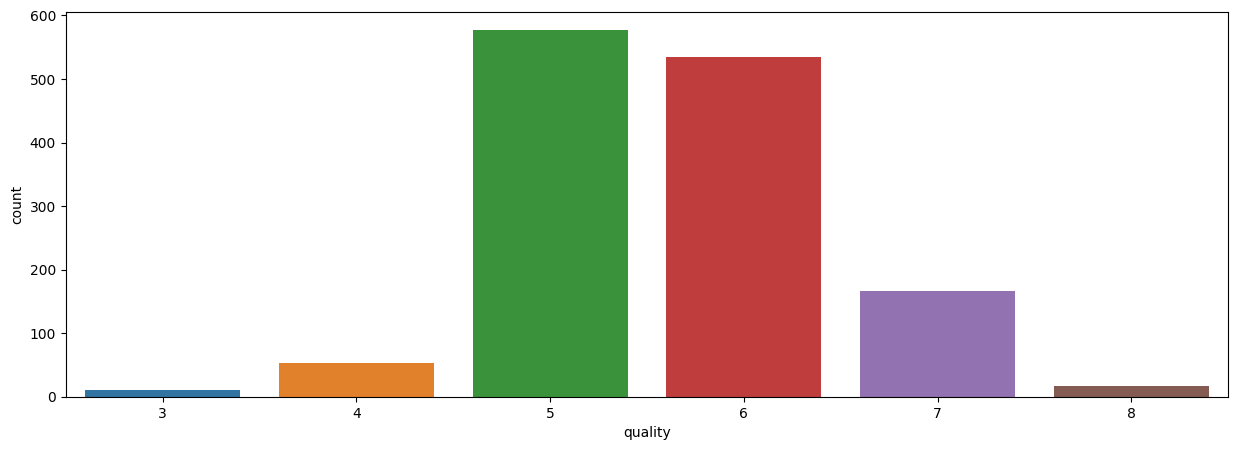

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_wine_quality_red,x = 'quality')

Create a new DataFrame **'Bar_chart'**:

- **df_wine_quality_red['quality']:** This selects the 'quality' column from the DataFrame df_wine_quality_red. Presumably, this column contains the quality ratings of red wines.

- **.value_counts():** This is a pandas DataFrame method that calculates the frequency of unique values in a column. In this case, it's calculating the frequency of each unique quality rating in the 'quality' column.

- **.to_frame():** This converts the resulting value counts series into a DataFrame. This is important because a DataFrame is a more versatile data structure for further manipulation and plotting.

- **.reset_index():** This method resets the index of the DataFrame to the default integer index. When you perform operations like value_counts(), the resulting DataFrame has the unique values as the index. Resetting the index will move the index values to a regular column and generate a new integer index.

In [ ]:
Bar_chart = df_wine_quality_red['quality'].value_counts().to_frame().reset_index()

In [ ]:
Bar_chart

,index,quality
0,5,577
1,6,535
2,7,167
3,4,53
4,8,17
5,3,10


##  Matplotlib

Matplotlib functions to create a bar chart that visualizes the counts of different quality ratings for red wines. The x-axis shows the quality ratings, the y-axis shows the counts, and each bar represents the count of a specific quality rating. The provided figure size and labels enhance the readability and context of the plot.

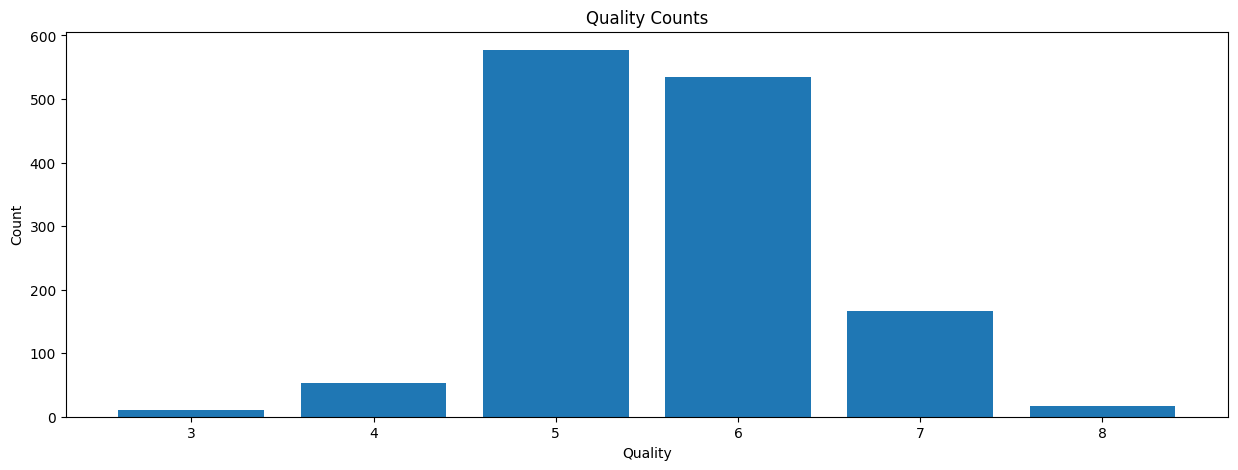

In [ ]:
plt.figure(figsize = (15,5))

# Create bar chart
plt.bar(Bar_chart['index'], Bar_chart['quality'])

plt.title('Quality Counts')
plt.xlabel('Quality')
plt.ylabel('Count')

plt.show()  # Display the plot

```
# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(Bar_chart['index'])))
```
This line generates a colormap using the plt.cm.viridis function from Matplotlib's color map module (plt.cm). A colormap is a range of colors that can be assigned to different data points in a plot to provide visual differentiation. In this case, it's creating a colormap based on the Viridis color map. The np.linspace(0, 1, len(Bar_chart['index'])) part generates an array of values ranging from 0 to 1 that matches the number of unique quality ratings in the Bar_chart DataFrame. These values are used to determine the colors in the colormap.

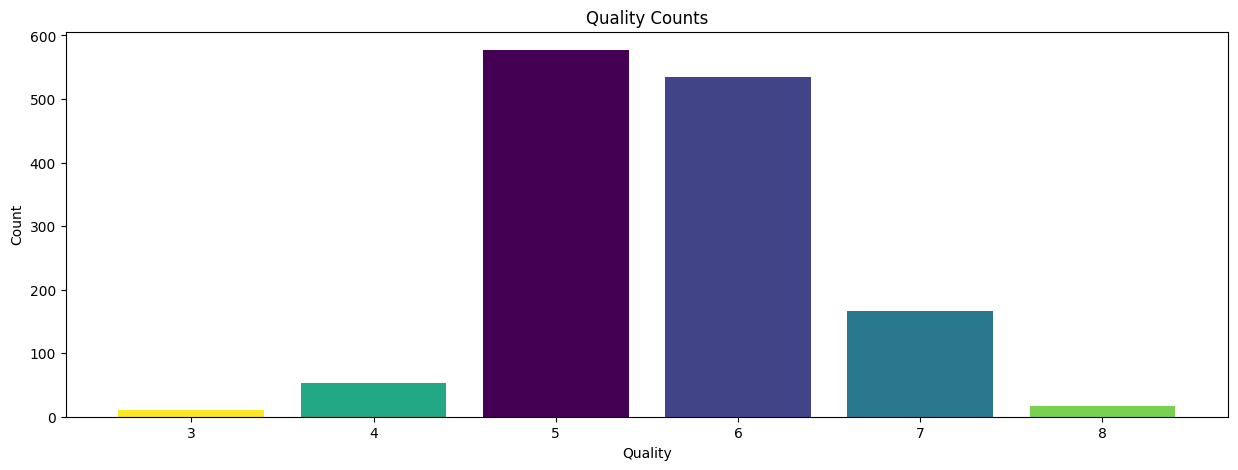

In [ ]:
# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(Bar_chart['index'])))

plt.figure(figsize = (15,5))

# Create bar chart
plt.bar(Bar_chart['index'], Bar_chart['quality'], color=colors)

plt.title('Quality Counts')
plt.xlabel('Quality')
plt.ylabel('Count')

plt.show()  # Display the plot

## Plotly

The code bellow is creating a bar chart using the Plotly Express library with a customized colormap. Plotly Express is a high-level data visualization library that simplifies the process of creating various types of interactive visualizations that allows you to zoom, pan, and hover over data points for additional information.

In [ ]:
# Create a colormap
colors = px.colors.sequential.Viridis

fig = px.bar(Bar_chart, x='index', y='quality', color='index',
             color_discrete_sequence=colors)

fig.update_layout(title='Quality Counts',
                  xaxis_title='Quality',
                  yaxis_title='Count',
                  width=800, height=400)

fig.show()

## Correlation Matrix

This is a pandas DataFrame method that calculates the correlation matrix between all pairs of numerical columns in the DataFrame. Each element in the correlation matrix represents the correlation coefficient between two variables. The correlation coefficient ranges from -1 to 1, where:

- A positive value close to 1 indicates a strong positive correlation (as one variable increases, the other tends to increase).
- A negative value close to -1 indicates a strong negative correlation (as one variable increases, the other tends to decrease).
- A value close to 0 indicates a weak or no linear correlation between the variables.

In [ ]:
df_wine_quality_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


The code bellow generates a heatmap that visually represents the correlations between the numerical features in the df_wine_quality_red DataFrame. The x and y-axis of the heatmap represent the features, and the color of each cell indicates the strength and direction of the correlation between the corresponding features. Positive correlations are typically shown in one color, negative correlations in another, and weak correlations in between.

<Axes: title={'center': 'correlation b/w features'}>

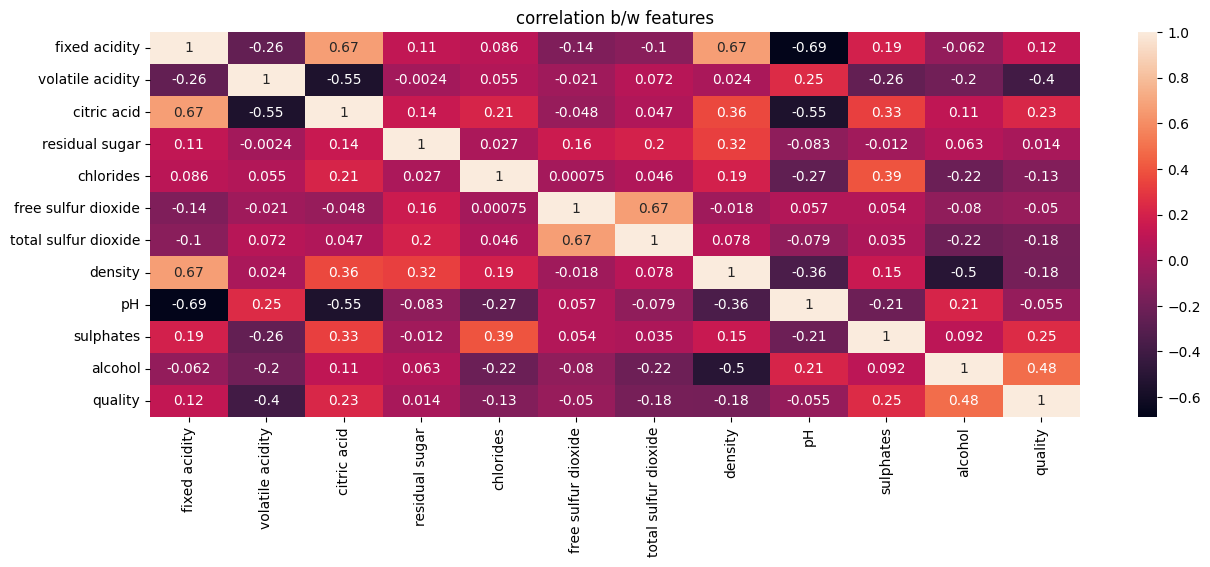

In [ ]:
plt.figure(figsize=(15,5))
plt.title('correlation b/w features')
sns.heatmap(df_wine_quality_red.corr(),annot=True)

In [ ]:
correlation_matrix = df_wine_quality_red.corr()

data = [go.Heatmap(z=correlation_matrix.values,
                   x=correlation_matrix.index,
                   y=correlation_matrix.columns,
                   colorscale='Reds')]

layout = go.Layout(title='Correlation Matrix',
                   xaxis_title='Features',
                   yaxis_title='Features')

fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

Here we are calculating the correlation coefficients between the 'quality' column and all other numerical columns in the df_wine_quality_red DataFrame, and then storing those correlation coefficients in a new DataFrame wine_quality_corr.

In [ ]:
wine_quality_corr = df_wine_quality_red.corr()['quality'].to_frame()

This code creates an interactive horizontal bar chart that visually represents the correlation of predictor features with a target feature. The choice of color scale enhances the visualization of the correlation values.

In [ ]:
# Generate a color scale
color_scale = px.colors.qualitative.Dark2
# color_scale = px.colors.qualitative.Set3

fig = px.bar(wine_quality_corr, x='quality', y=wine_quality_corr.index,
             orientation='h',
             title='Correlation of Target Feature with Predictor Features',
             labels={'quality': 'Correlation', 'index': 'Predictor Features'},
             color='quality', color_continuous_scale=color_scale)

fig.show()

## Supervised learning

Supervised learning is a type of machine learning where the algorithm is trained on a labeled dataset, meaning that the input data is paired with the correct output (label). The goal of supervised learning is to learn a mapping from inputs to outputs so that the algorithm can make accurate predictions or classifications on new, unseen data.

In [ ]:
# Split the data into features (X) and target variable (y)
y = df_wine_quality_red['quality']
X = df_wine_quality_red.drop(['quality'],
                             axis=1)

- **X:** This represents the feature matrix or dataset containing the input features for your machine learning model. Each row of X corresponds to a data point, and each column corresponds to a feature or attribute.

- **y:** This represents the target or output variable for your machine learning model. It contains the corresponding labels or target values for each data point in X.

- **train_test_split:** This is a function provided by scikit-learn that splits the dataset into training and testing sets.

- **test_size=0.25:** This parameter specifies the proportion of the data that should be used for testing. In this case, it's set to 0.25, which means that 25% of the data will be used for testing, and the remaining 75% will be used for training.

- **random_state=42:** This parameter sets the random seed for reproducibility. It ensures that the data split will be the same every time the code is executed with the same random state. The value 42 is an arbitrary choice and can be any non-negative integer.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

- **X_train:** This will contain the training data (input features) that the model will learn from.

- **X_test:** This will contain the testing data (input features) that the model will be evaluated on.

- **y_train:** This will contain the corresponding training labels or target values.

- **y_test:** This will contain the corresponding testing labels or target values.

In [ ]:
# Shape of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1019, 11), (340, 11), (1019,), (340,))

## Random Forest Classifier

Random Forest Classifier object called clf. The Random Forest Classifier is a machine learning algorithm that belongs to the ensemble learning family. It builds multiple decision tree classifiers and combines their predictions to improve accuracy and reduce overfitting.


```
# Fit the model to the training data
clf.fit(X_train, y_train)
```


This line trains (fits) the Random Forest Classifier model using the training data. X_train contains the input features for the training data, and y_train contains the corresponding target labels. The model learns to make predictions by analyzing the relationships between the features and the labels in the training data.

```
# Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)
```

This line uses the trained classifier to predict the labels (target values) for the test data (X_test). The predicted labels are stored in the array y_pred.

The accuracy_score function from a library like scikit-learn is used to compare the predicted labels (y_pred) with the actual labels from the test data (y_test) and calculate the accuracy.

In [ ]:
# Random Forest Classifier
clf = RandomForestClassifier()

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = round(accuracy * 100, 3)

# Display accuracy
print(f"Accuracy: {accuracy_percent}%")

Accuracy: 63.235%


## Overview of Common Classification Models
1. **Ridge Classification (RidgeClassifier):**

  - Ridge Classifier is a type of linear classifier.
  - It extends linear regression by adding a penalty term to prevent overfitting.
  - Particularly useful when dealing with multicollinearity in the data.
2. **k-Nearest Neighbors (k-NN) Classifier (KNeighborsClassifier):**

  - k-NN is a simple and intuitive classification algorithm.
  - It classifies a data point based on the class labels of its k nearest neighbors.
  - The choice of 'k' affects the algorithm's sensitivity to noise.
3. **Gaussian Naïve Bayes Classifier (GaussianNB):**

  - Naïve Bayes is a probabilistic classifier based on Bayes' theorem.
  - Gaussian Naïve Bayes assumes that features follow a Gaussian (normal) distribution.
  - Often used in text classification and other applications with high dimensionality.
4. **Decision Trees Classifier (DecisionTreeClassifier):**

  - Decision Trees create a tree-like model of decisions and their possible consequences.
  - They split the data into subsets based on the value of input features.
  - Each subset is further split or assigned a label, resulting in a tree of decisions.
5. **Stochastic Gradient Descent (SGD) Classifier (SGDClassifier):**

  - SGD is an optimization technique often used for training machine learning models.
  - SGD Classifier uses this technique for classification tasks.
  - It updates model parameters iteratively to minimize the loss function.
6. **Support Vector Machines (SVM) Classifier (svm.SVC):**

  - SVM is a powerful classification algorithm.
  - It aims to find a hyperplane that best separates different classes in the feature space.
  - It can handle both linear and non-linear classification problems using kernel functions.


In [ ]:
# Make list of models for testing
models = [
    ('Ridge classification', RidgeClassifier()),
    ('k-Nearest Neighbors (k-NN)', KNeighborsClassifier(n_neighbors=3)),
    ('Gaussian Naïve Bayes classifier', GaussianNB()),
    ('Decision Trees', tree.DecisionTreeClassifier()),
    ('Stochastic Gradient Descent (SGD) Classifier', SGDClassifier()),
    ('Support vector machines (SVM)', svm.SVC())
]

Accuracy_of_Model = pd.DataFrame(columns = ['Model','Cross-validation average score','Accuracy score','Precision score','Recall score','F1 score'])
Execution_Time = pd.DataFrame(columns = ['Model','Execution Time (seconds)'])

names = []
accuracy = []
cv = []
times = []

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through the models in list and get score for each
for name, model in models:
    start_time = time.time()
    Y_pred = model.fit(X_train, y_train).predict(X_test)
    names.append(name)
    end_time = time.time()
    times.append(end_time - start_time)

    scores = cross_val_score(model, X, y, cv=10)
    cv.append(scores)

    # Compute Accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, Y_pred)
    accuracy_percentage = accuracy * 100
    accuracy_scores.append(accuracy_percentage)

    # Compute Macro-Averaged Precision: tp / (tp + fp)
    macro_precision = precision_score(y_test, Y_pred, average='macro')
    macro_precision_percentage = macro_precision * 100
    precision_scores.append(macro_precision_percentage)

    # Compute Macro-Averaged Recall: tp / (tp + fn)
    macro_recall = recall_score(y_test, Y_pred, average='macro')
    macro_recall_percentage = macro_recall * 100
    recall_scores.append(macro_recall_percentage)

    # Compute Macro-Averaged F1 Score: 2 * tp / (2 * tp + fp + fn)
    macro_f1 = f1_score(y_test, Y_pred, average='macro')
    macro_f1_percentage = macro_f1 * 100
    f1_scores.append(macro_f1_percentage)

array_cv = array(cv)
row_average = average(array_cv , axis=1)*100

Accuracy_of_Model['Model'] = names
Accuracy_of_Model['Cross-validation average score'] = row_average
Accuracy_of_Model['Accuracy score'] = accuracy_scores
Accuracy_of_Model['Precision score'] = precision_scores
Accuracy_of_Model['Recall score'] = recall_scores
Accuracy_of_Model['F1 score'] = f1_scores

Execution_Time['Model'] = names
Execution_Time['Execution Time (seconds)'] = times


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

## Key Evaluation Metrics for Classification Models
1. **Cross-Validation Average Score:**

  - Cross-validation is a technique used to assess how well a model generalizes to new, unseen data.
  - The "Cross-Validation Average Score" typically refers to the average performance metric (e.g., accuracy, precision, recall, F1 score) across multiple folds of cross-validation.
  - Cross-validation involves dividing the dataset into multiple subsets (folds) and training and evaluating the model on different combinations of training and testing subsets. The average score provides a more robust estimation of the model's performance than evaluating it on a single test set.
2. **Accuracy Score:**

  - Accuracy is a common performance metric for classification models.
  - It measures the ratio of correctly predicted instances to the total number of instances in the dataset.
  - It's a simple and intuitive metric but may not be suitable for imbalanced datasets, where one class is much more frequent than the others.
3. **Precision Score:**

  - Precision is a metric that measures the proportion of correctly predicted positive instances out of all instances predicted as positive by the model.
  - It focuses on the accuracy of positive predictions, which is particularly important when the cost of false positives is high (e.g., in medical diagnoses).
4. **Recall Score (Sensitivity or True Positive Rate):**

  - Recall measures the proportion of correctly predicted positive instances out of all actual positive instances in the dataset.
  - It focuses on the ability of the model to correctly identify positive instances, which is crucial when the cost of false negatives is high (e.g., in detecting fraudulent activities).
5. **F1 Score:**

  - The F1 score is the harmonic mean of precision and recall.
  - It provides a balance between precision and recall, especially when dealing with imbalanced datasets.
  - F1 score is a useful metric when you want to consider both false positives and false negatives.

In [ ]:
Accuracy_of_Model

,Model,Cross-validation average score,Accuracy score,Precision score,Recall score,F1 score
0,Ridge classification,56.143791,60.000000,19.831077,24.105924,21.758538
1,k-Nearest Neighbors (k-NN),43.268519,42.941176,22.821767,21.733735,21.755025
2,Gaussian Naïve Bayes classifier,52.908497,55.294118,31.472784,36.967816,33.043121
3,Decision Trees,44.740741,50.294118,26.256238,26.963271,26.431949
4,Stochastic Gradient Descent (SGD) Classifier,38.780501,38.823529,14.812067,16.946908,10.085784
5,Support vector machines (SVM),49.665033,49.411765,35.138209,20.727962,18.410541


In [ ]:
Execution_Time

,Model,Execution Time (seconds)
0,Ridge classification,0.033599
1,k-Nearest Neighbors (k-NN),0.020177
2,Gaussian Naïve Bayes classifier,0.003850
3,Decision Trees,0.010558
4,Stochastic Gradient Descent (SGD) Classifier,0.026416
5,Support vector machines (SVM),0.088594


In [ ]:
Accuracy_of_Model['Model'] = ['RC', 'k-NN', 'NB', 'DT', 'SGD', 'SVM']

In [ ]:
fig = make_subplots(rows=1, cols=5, subplot_titles=['Cross-validation average', 'Accuracy', 'Precision', 'Recall', 'F1'])

metrics = ['Cross-validation average score', 'Accuracy score', 'Precision score', 'Recall score', 'F1 score']

# Generate random color for each model
random_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in Accuracy_of_Model['Model']]

for i, metric in enumerate(metrics, start=1):
    trace = go.Bar(x=Accuracy_of_Model['Model'], y=Accuracy_of_Model[metric], name=metric, marker_color=random_colors)
    fig.add_trace(trace, row=1, col=i)

# Update y-axis tick labels to rotate them
fig.update_xaxes(tickangle=-60)  # Adjust the angle as needed

fig.update_layout(title_text='Model Performance Metrics',
                  showlegend=False,
                  height=400,
                  width=1200)

fig.show()

#### **Exercises 1.1**

Utilizing the illustration provided earlier, employ three distinct machine learning algorithms to conduct an assessment on the accuracy and execution time. These evaluations will be performed on the dataset presented below, with a particular focus on the 'label' attribute, which serves as the target variable:

https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
paths = '/content/drive/MyDrive/data_science/Crop_recommendation.csv'
predict_col = 'label'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import time
labelencoder = LabelEncoder()
data = pd.read_csv(paths)
##Convert label column from categorical to int
data['one_hot_label'] = labelencoder.fit_transform(data['label'])

#SPLIT DATA

label_y =data['one_hot_label']
data=data.drop(['label','one_hot_label'],axis=1)

train_df, test_df, y_train, y_test = train_test_split(data,
                                                    label_y,
                                                    test_size=0.25,
                                                    random_state=42)

In [ ]:
## import Machine Learning algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
models_set= ['random_classifier','gradientBoost','descisionTree']

##initialize models
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
descisionTree = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)

all_models_set= [random_forest,gradient_boosting,descisionTree]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score

def accurcy_models(model_str):
  start_time = time.time()
  model_str.fit(train_df,y_train)
  end_time = time.time()
  total_time = (end_time - start_time)
  y_pred=model_str.predict(test_df)
  acc =accuracy_score(y_pred,y_test.values)
  return total_time,acc


def resolve_model_name(names):
    if names == random_forest:
      return 'RandomClassifier'
    elif names == gradient_boosting:
      return 'GradientBoosting'
    elif names == descisionTree:
      return 'DescisionTree'
    else:
        return 'algo unknown'

accuracy_list = []
time_list = []
algo_list=[]

for item in all_models_set:
  time_performance,acc_score = accurcy_models(item)
  accuracy_list.append(acc_score*100)
  time_list.append(time_performance)
  algo_list.append(resolve_model_name(item))

performance_df =pd.DataFrame({'ML Model':algo_list,'Execution Time':time_list,'Accuracy':accuracy_list})

print(performance_df)

           ML Model  Execution Time   Accuracy
0  RandomClassifier        0.613012  98.727273
1  GradientBoosting       12.871640  98.181818
2     DescisionTree        0.011773  98.727273


In [ ]:
performance_df['Model'] = ['RC', 'GB','DT']
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import random

fig = make_subplots(rows=1, cols=5, subplot_titles=['Accuracy','Execution Time'])

metrics = ['Accuracy','Execution Time']

# Generate random color for each model
random_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in performance_df['Model']]

for i, metric in enumerate(metrics, start=1):
    trace = go.Bar(x=performance_df['Model'], y=performance_df[metric], name=metric, marker_color=random_colors)
    fig.add_trace(trace, row=1, col=i)

# Update y-axis tick labels to rotate them
fig.update_xaxes(tickangle=-60)  # Adjust the angle as needed

fig.update_layout(title_text='Model Performance Metrics',
                  showlegend=False,
                  height=400,
                  width=1200)

fig.show()

**According to the results obtained** :


1.   Accuracy is similiar amongst all the algorithms
2.  The Fastest algorithm is DescisionTree is the fastest and Gradient Boosting is the slowest

## Multivariable Linear Regression

Multivariable Linear Regression, also known as Multiple Linear Regression, is a statistical and machine learning technique used for modeling the relationship between multiple independent variables (also called features or predictors) and a single dependent variable (also called the target or outcome).

In simple linear regression, you model the relationship between one independent variable and the dependent variable using a straight line (linear equation). However, in multivariable linear regression, you extend this concept to multiple independent variables. The goal is to find the best-fitting linear equation that describes how changes in the independent variables are associated with changes in the dependent variable.

In [ ]:
csv_url =  "https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv"

In [ ]:
# Training dataset
df_train = pd.read_csv(csv_url)

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Histogram


*sns.distplot(df_train['SalePrice'], color='#FF69B4')* uses the Seaborn library to create a distribution plot (histogram) of the 'SalePrice' column from the DataFrame *df_train*. The plot will include both a histogram (bars representing the frequency of each 'SalePrice' range) and a smoothed curve (kernel density estimate) that provides an estimate of the underlying probability distribution of the data. The specified color '#FF69B4' will be used for the bars in the histogram.

<ipython-input-108-f848e289e6c7>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='SalePrice', ylabel='Density'>

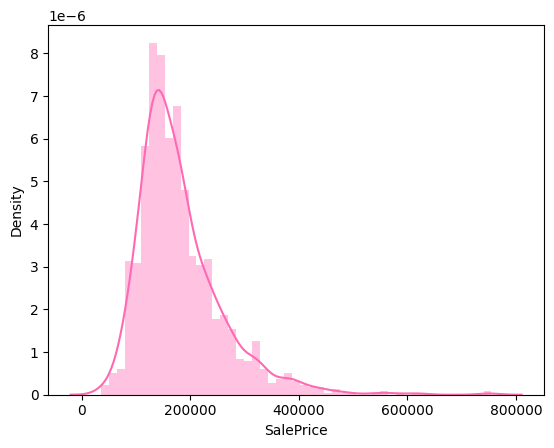

In [ ]:
sns.distplot(df_train['SalePrice'], color = '#FF69B4')

In [1]:
# Color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

corrmat = df_train.corr()
k = 9 # Number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_train[cols].corr(), vmax=.8, square=True, cmap=cmap, annot=True, fmt=".2f");

NameError: ignored

The code bellow calculates and presents a summary of missing data in the df_train DataFrame, including the total count and percentage of missing values for each column. This helps in understanding the extent of missing data and identifying columns that might require data imputation or handling.

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


#### The top 'five' features that has high correlation with the sales price:

1. **OverallQual:** Overall material and finish quality (0.79)

2. **GrLivArea:** Above grade (ground) living area square feet (0.71)

3. **GarageCars:** Size of garage in car capacity (0.64)

4. **GarageArea:** Size of garage in square feet (0.62)

 4.1. **TotalBsmtSF:** Total square feet of basement area (0.61)

 4.2. **1stFlrSF**: First Floor square feet (0.61)

I will use the top 4 and 1stFlrSF in this project.

In [ ]:
# Get the added variables for Multivariable Linear Regression
X = df_train[['OverallQual', 'GrLivArea', 'GarageCars','GarageArea','1stFlrSF']]
# Get the sales price
y = df_train['SalePrice']

In [ ]:
# Split 80% of the data to training set while 20% of the data to test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##  Linear Regression

Linear regression is a statistical and machine learning technique used to model the relationship between a dependent variable (also called the target or outcome) and one or more independent variables (also called features or predictors). The goal of linear regression is to find the best-fitting linear relationship that explains the variation in the dependent variable based on the independent variables.

In [ ]:
# Call and fit linear regression to the dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

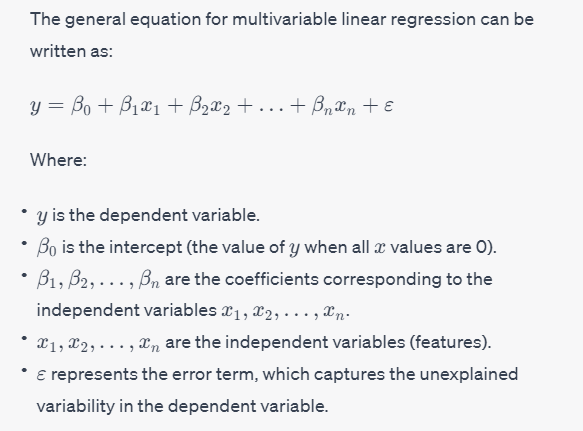

In [ ]:
# After training, in case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes.
# Let us see the coeficient

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
OverallQual,25010.726676
GrLivArea,41.866361
GarageCars,6630.504586
GarageArea,46.844310
1stFlrSF,38.840286


In [ ]:
# To make predictions
y_pred = regressor.predict(X_test)

In [ ]:
# Compare the actual vs the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
529,200624,274942.660961
491,133000,157179.039239
459,110000,122530.635752
279,192000,227513.053538
655,88000,121138.407305
...,...,...
326,324000,260206.335780
440,555000,381302.951316
1387,136000,223165.328126
1323,82500,43150.641230


1. **bars = ('OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF'):** This line defines a tuple named bars containing the names of the variables or features that you want to compare. These features seem to be related to some kind of housing or property data.

2. **x_pos = np.arange(len(bars)):** Here, the np.arange(len(bars)) function from the NumPy library is used to create an array of evenly spaced values from 0 to one less than the length of the bars tuple. This array is assigned to x_pos and will be used to position the bars on the x-axis of the bar plot.

3. **df.head().plot(y=["Actual", "Predicted"], color=['pink', 'cyan'], kind="bar"):** This line of code generates a bar plot using data from the DataFrame df, specifically the first five rows (as indicated by .head()). It plots the values of the "Actual" and "Predicted" columns. The color parameter specifies the colors of the bars for the "Actual" and "Predicted" data. The kind parameter is set to "bar", indicating that a bar plot should be created.

4. **plt.xticks(x_pos, bars):** This line sets the tick positions and labels on the x-axis of the plot. It uses plt.xticks() from the matplotlib library to place the ticks at the positions defined by x_pos and label them with the names from the bars tuple.

([<matplotlib.axis.XTick at 0x7a28008df700>,
 [Text(0, 0, 'OverallQual'),
  Text(1, 0, 'GrLivArea'),
  Text(2, 0, 'GarageCars'),
  Text(3, 0, 'GarageArea'),
  Text(4, 0, '1stFlrSF')])

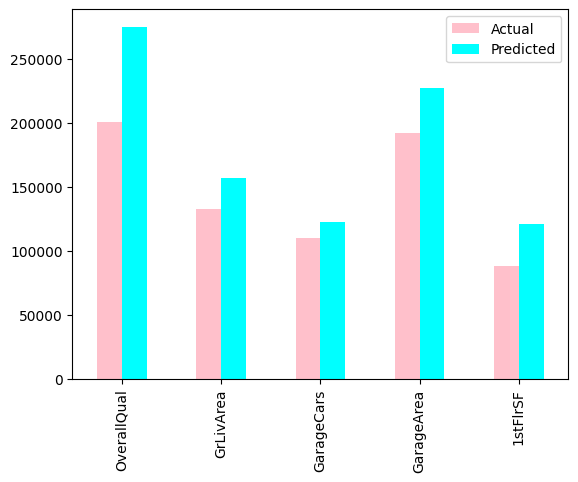

In [ ]:
# Visualie the predicted vs the actual
bars = ('OverallQual', 'GrLivArea', 'GarageCars','GarageArea','1stFlrSF')
x_pos = np.arange(len(bars))
df.head().plot(y = ["Actual", "Predicted"], color = ['pink','cyan'], kind="bar")
# Create names on the x-axis
plt.xticks(x_pos, bars)

### Model Performance Evaluation Metrics

- `print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))`: This line calculates and prints the Mean Absolute Error (MAE) between the actual target values (y_test) and the predicted values (y_pred). MAE is the average of the absolute differences between the actual and predicted values. It measures the average magnitude of errors without considering their direction.

- `print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))`: This line calculates and prints the Mean Squared Error (MSE) between the actual target values (y_test) and the predicted values (y_pred). MSE is the average of the squared differences between the actual and predicted values. It amplifies larger errors more than smaller errors.

- `print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))`: This line calculates and prints the Root Mean Squared Error (RMSE) between the actual target values (y_test) and the predicted values (y_pred). RMSE is the square root of the MSE and provides a measure of the typical magnitude of errors. By taking the square root, it brings the error metric back to the original scale of the data.

In [ ]:
# Evaluate the performance of the model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 27258.30539265597
Mean Squared Error: 2296157434.8456054
Root Mean Squared Error: 47918.23697555666


## Logistic Regression

Logistic Regression is a statistical method used for binary classification, which means it's used to predict one of two possible outcomes based on input features. Despite its name, logistic regression is actually a classification algorithm rather than a regression algorithm used for predicting continuous values.

The primary goal of logistic regression is to model the probability that a given input instance belongs to a particular class. It's particularly useful when the dependent variable (the outcome to be predicted) is categorical, and the classes are binary, such as yes/no, 1/0, or true/false.

In [ ]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning:

The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.



In [ ]:
# Dataset size -> (28 by 28 images for a dimensionality of 784)
print("Dataset size:" , X.shape)

# Shape of our labels -> 70000 labels (integers values from 0–9)
print("Dataset Shape: ", y.shape)

Dataset size: (70000, 784)
Dataset Shape:  (70000,)


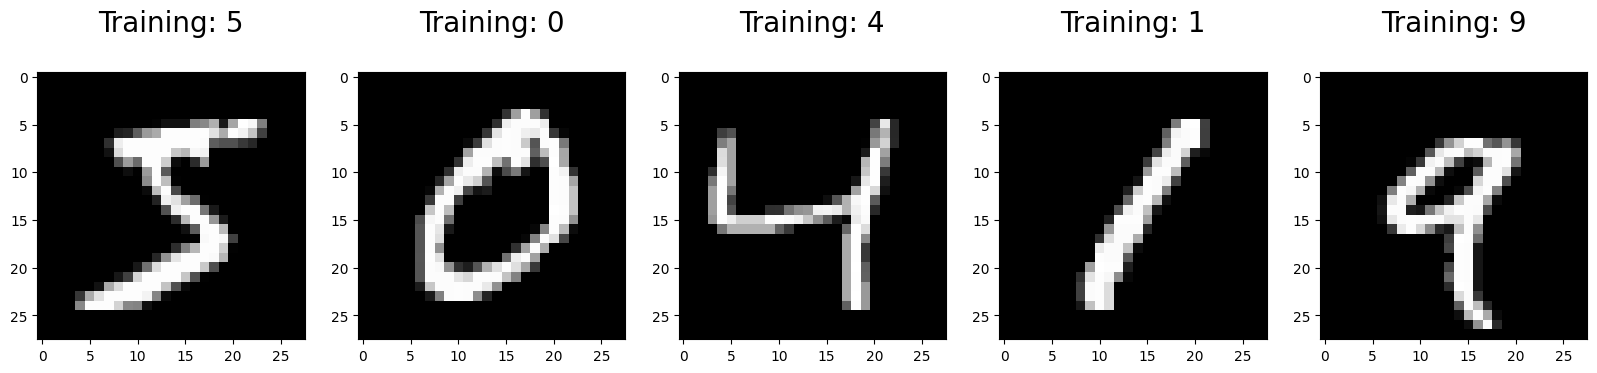

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %s\n' % label, fontsize = 20)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

 Standardization is important for many machine learning algorithms because it ensures that all features are on the same scale, preventing some features from dominating others due to their larger magnitudes. This can lead to improved convergence and performance of the machine learning models. The use of the StandardScaler from scikit-learn simplifies the process of scaling and ensures that the scaling parameters are consistent between training and test data.

- **from sklearn import preprocessing:** This line imports the preprocessing module from scikit-learn, which contains various functions and classes for data preprocessing tasks.

- **scaler = preprocessing.StandardScaler().fit(x_train):** Here, a StandardScaler instance is created and fitted to the training data (x_train). The StandardScaler is used for standardization, which transforms the features such that they have a mean of 0 and a standard deviation of 1.

- **X_scaled_train = scaler.transform(x_train):** This line applies the transformation to the training data. It scales the x_train features using the mean and standard deviation learned from the training data, resulting in X_scaled_train, which contains the standardized features.

- **x_scaled_test = scaler.transform(x_test):** Similarly, the transform method is applied to the test data (x_test) using the same scaler instance. This ensures that both the training and test data are transformed consistently using the statistics computed from the training data.

In [ ]:
# standardize or normalize the dataset
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
X_scaled_train = scaler.transform(x_train) # Scaled data has zero mean and unit variance
x_scaled_test = scaler.transform(x_test)

In [ ]:
X_scaled_train.mean(axis=0) # check the mean of the scaled value
X_scaled_train.std(axis=0) # check the standard variation of the scaled value

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # all parameters that are not specified are set to their default values

In [ ]:
model.fit(X_scaled_train, y_train) # learn the relationship between X and y

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
# make predictions for the entire dataset
predictions = model.predict(x_scaled_test)
print(predictions)

['0' '4' '1' ... '7' '4' '6']


In [ ]:
# Use score method to get accuracy of model
score = model.score(x_scaled_test, y_test)
print(score)

0.9092857142857143


In [ ]:
y_test

array(['0', '4', '1', ..., '7', '4', '6'], dtype=object)

In [ ]:
predictions

array(['0', '4', '1', ..., '7', '4', '6'], dtype=object)

In [ ]:
# Calculate accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)

# Calculate precision: tp / (tp + fp)
precision = precision_score(y_test, predictions, average='micro')
print('Precision: %f' % precision)

# Calculate recall: tp / (tp + fn)
recall = recall_score(y_test, predictions, average='micro')
print('Recall: %f' % recall)

# Calculate F1 score: 2 * (precision * recall) / (precision + recall)
f1 = f1_score(y_test, predictions, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.909286
Precision: 0.909286
Recall: 0.909286
F1 score: 0.909286


 The heatmap provides a clear representation of the model's performance in terms of true positives, true negatives, false positives, and false negatives. The annotations inside the cells display the counts or percentages of each category, and the color map helps visualize the differences in values across the matrix. The title of the heatmap also includes the accuracy score of the model.

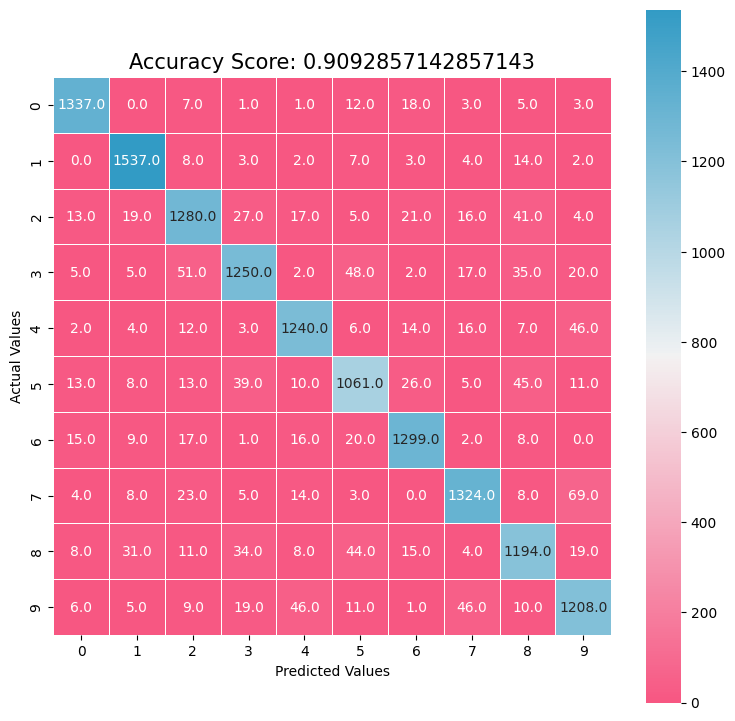

In [ ]:
# confusion matrix using seaborn data visualization library
cma = metrics.confusion_matrix(y_test, predictions)
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
plt.figure(figsize=(9,9))
sns.heatmap(cma, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = cmap);
plt.ylabel('Actual Values');
plt.xlabel('Predicted Values');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

The classification_report function neatly formats these metrics for each class and provides a weighted average of these metrics (weighted by class support) to give an overall assessment of the model's performance. This report is particularly helpful in multi-class classification problems or when you want a comprehensive view of how well the model is performing across different classes.
- **Precision:** The proportion of true positive predictions out of all positive predictions (true positives + false positives). It measures the accuracy of positive predictions.
- **Recall (Sensitivity or True Positive Rate):** The proportion of true positive predictions out of all actual positive instances (true positives + false negatives). It measures how well the model captures positive instances.
- **F1-Score:** The harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives.
- **Support:** The number of actual occurrences of the class in the test data.
- **Accuracy:** The ratio of correctly predicted instances to the total instances.



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1387
           1       0.95      0.97      0.96      1580
           2       0.89      0.89      0.89      1443
           3       0.90      0.87      0.89      1435
           4       0.91      0.92      0.92      1350
           5       0.87      0.86      0.87      1231
           6       0.93      0.94      0.93      1387
           7       0.92      0.91      0.91      1458
           8       0.87      0.87      0.87      1368
           9       0.87      0.89      0.88      1361

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



This code snippet bellow creates a scatter plot that allows you to visually compare the predicted values from a model (predictions) with the actual target values (y_test). Each point on the plot represents a data instance, where the x-coordinate represents the predicted value and the y-coordinate represents the actual value. This type of visualization is useful for quickly assessing how well the model's predictions align with the actual data points. If the points are closely clustered around a diagonal line (the line where predicted equals actual), it indicates that the model's predictions are in close agreement with the actual values.

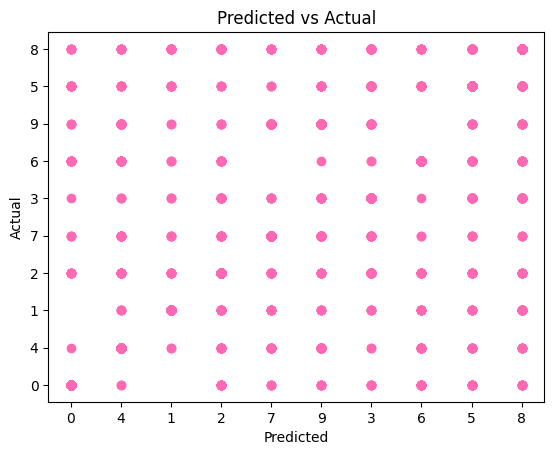

In [ ]:
# Plot outputs
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.scatter(y_test, predictions, color="hotpink")
plt.show()

`plt.plot(y_test, predictions, color="cyan", linewidth=0.04):`
This line adds a line plot to the scatter plot. It uses the plot() function to create a line that represents the relationship between y_test and predictions. The line color is set to "cyan", and the linewidth parameter is set to 0.04 to control the thickness of the line. This line plot can be interpreted as a visual representation of a cost function or error metric, as it shows how the predicted values differ from the actual values.

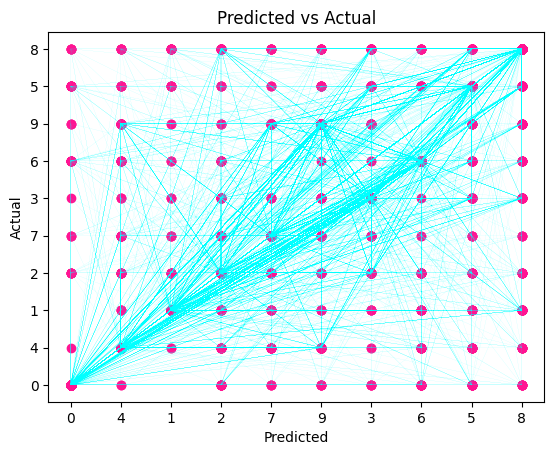

In [ ]:
# Plot outputs
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.scatter(y_test, predictions, color="deeppink")
# see the plot of the cost function
plt.plot(y_test, predictions, color="cyan", linewidth=0.04)
plt.show()

## Neural Network (NN) 1

**TensorFlow:** TensorFlow is an open-source machine learning framework developed by Google. It is widely used for various machine learning tasks, including building and training deep learning models. TensorFlow provides a versatile platform for creating and working with various types of neural networks.

**Keras:** Keras is an API (Application Programming Interface) designed for building and training neural networks. Originally developed as an independent library, it has been integrated into TensorFlow as its high-level API. Keras simplifies the process of building, configuring, and training neural networks, making it easier for developers to create complex models with fewer lines of code.

In [ ]:
from keras.datasets import mnist
from tensorflow import keras

`(train_images, train_labels), (test_images, test_labels) = mnist.load_data():` This line of code loads the MNIST dataset and splits it into training and test sets. The dataset contains images of handwritten digits (0 to 9) along with corresponding labels indicating the actual digit each image represents. The structure of the dataset is such that images and labels are separated into different tuples.

- **train_images:** This variable stores the training images. These are grayscale images of size 28x28 pixels represented as a 2D NumPy array.
- **train_labels:** This variable stores the corresponding labels for the training images, indicating the actual digit represented in each image.
- **test_images:** This variable stores the test images, similar to train_images but for evaluating the model's performance.
- **test_labels:** This variable stores the corresponding labels for the test images.

The mnist.load_data() function loads the MNIST dataset from the Keras library. Keras provides a simplified interface to datasets like MNIST, which makes it easier to work with them in machine learning projects.

In [ ]:
# loading our dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)

(60000, 28, 28)


By performing this normalization, the pixel values of the images are scaled to a range between -0.5 and 0.5. This range is often chosen because it helps prevent the neural network from saturating (reaching extreme activation values) during training, which can lead to better convergence and improved performance.

In [ ]:
# normalize the images
train_images = (train_images/ 255) - 0.5
test_images = (test_images / 255) - 0.5

The reason for flattening the images is to convert them from a grid of pixels to a linear sequence of pixel values. Many machine learning algorithms, including neural networks, expect the input data to be in a 1D vector format. By flattening the images, each pixel becomes a separate feature that the neural network can process individually. This transformation makes it easier to pass the image data as input to a neural network's input layer, which often requires a 1D vector.

In [ ]:
# Flatten the images so that we can pass it into our network
train_images = train_images.reshape(-1,784)
test_images = test_images.reshape(-1,784)

In [ ]:
print(train_images.shape)

(60000, 784)


1. **from tensorflow.keras.models import Sequential:** This line imports the Sequential class from the models module of the Keras API in TensorFlow. The Sequential class allows you to create a neural network model as a sequence of layers stacked on top of each other.

2. **from tensorflow.keras.layers import Dense:** This line imports the Dense layer class from the layers module of the Keras API in TensorFlow. The Dense layer represents a fully connected (dense) layer in a neural network.

3. **model = Sequential([...]):** This line creates a sequential neural network model and defines its architecture using the Sequential class. The model will be built by stacking the specified layers in sequence.

4. **Dense(64, activation='relu', input_shape=(784,)):** This line adds the first Dense layer to the model. It has 64 neurons and uses the ReLU activation function ('relu'). The input_shape parameter is set to (784,), indicating that the input data should have 784 features. This is appropriate since the flattened MNIST images have 784 pixels (28x28).

5. **Dense(64, activation='relu'):** This line adds another Dense layer with 64 neurons and ReLU activation. This layer follows the first layer in sequence.

6. **Dense(10, activation='softmax'):** This line adds the output Dense layer with 10 neurons, which corresponds to the number of classes in the MNIST dataset (digits 0 to 9). The activation function is set to softmax, which is often used for multiclass classification tasks. The softmax function converts the raw model outputs into probabilities, indicating the likelihood of each class.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
 Dense(64, activation = 'relu', input_shape = (784, )),
 Dense(64, activation = 'relu'),
 Dense(10, activation = 'softmax'),
])

**model.compile(...):** This line is where you compile the model using the compile method. The compile method accepts several parameters that determine how the model will be optimized and evaluated during training.

  - **optimizer='adam':** The optimizer is the algorithm that adjusts the model's parameters to minimize the loss function. 'adam' is a popular optimization algorithm that adapts the learning rate during training to speed up convergence and handle different types of data.

  - **loss='categorical_crossentropy':** The loss function is a measure of how well the model's predictions match the actual target values. 'categorical_crossentropy' is a commonly used loss function for multiclass classification problems, where the target values are one-hot encoded. It quantifies the difference between predicted probabilities and true labels.

  - **metrics=['accuracy']:** Metrics are additional evaluation criteria used during training. 'accuracy' is a common metric that measures the proportion of correctly predicted instances. During training, the model will keep track of the accuracy metric to provide feedback on its performance.

In [ ]:
# Compiling the model
model.compile(
    optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#### **model.fit(...)** This line starts the training process of the neural network model.

- **train_images:** This is the input training data, consisting of the flattened MNIST images.

- **to_categorical(train_labels):** The to_categorical function is applied to the train_labels to convert the integer labels into one-hot encoded labels. One-hot encoding is a way to represent categorical data, where each label is represented as a binary vector where one element is set to 1 and the rest are set to 0. This format is suitable for training neural networks for multiclass classification tasks.

- **epochs = 5:** The epochs parameter specifies the number of times the entire training dataset will be used to update the model's parameters. In this case, the model will be trained for 5 epochs.

- **batch_size = 32:** The batch_size parameter defines the number of training examples used in each iteration of a single epoch. In this case, the training data is divided into batches of 32 examples each, and the model's parameters are updated after processing each batch.

In [ ]:
# Training the model
from tensorflow.keras.utils import to_categorical
model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 5,
    batch_size = 32
)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3512 - accuracy: 0.8936
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1785 - accuracy: 0.9448
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1377 - accuracy: 0.9572
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1146 - accuracy: 0.9638
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0993 - accuracy: 0.9690


In [ ]:
# Evalute the preformance
model.evaluate(
    test_images,
    to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.1154 - accuracy: 0.9639


[0.11535137891769409, 0.9639000296592712]

**model.save_weights('model.h5'):** This line uses the save_weights method of the trained neural network model (model) to save the model's weights to a file named 'model.h5'.

  - **model:** This is the trained neural network model that you have been working with.

  - **save_weights('model.h5'):** This method call saves the model's weights to the specified file, 'model.h5' in this case. The .h5 extension is often used for Hierarchical Data Format (HDF5) files, a format that is commonly used for storing large datasets and model weights.

In [ ]:
# Save the model to the disk
model.save_weights('model.h5')

In [ ]:
# Reload the saved weights
model2 = Sequential([
 Dense(64, activation = 'relu', input_shape = (784, )),
 Dense(64, activation = 'relu'),
 Dense(10, activation = 'softmax'),
])

**model2.load_weights('model.h5'):** This line uses the load_weights method of a neural network model (model2) to load weights from a file named 'model.h5'.

  - **model2:** This is the neural network model into which you want to load the saved weights. This model should have a similar architecture to the model that was used to save the weights.

  - **load_weights('model.h5'):** This method call loads the weights stored in the specified file, 'model.h5' in this case, and applies them to the model2's layers.

In [ ]:
# load the weights from the model to the model2
model2.load_weights('model.h5')

In [ ]:
# Predict on the first 5 test images
predictions = model.predict(test_images[:5])
print(predictions)

1/1 [==============================] - 0s 448ms/step
[[9.98298674e-07 5.48671733e-06 1.34099624e-04 3.90394343e-05
  6.53376298e-10 2.09028372e-07 3.20292126e-11 9.99806106e-01
  3.97389567e-06 9.93251797e-06]
 [7.12353057e-08 2.01377884e-06 9.99979019e-01 1.58780731e-05
  7.00148836e-12 6.40917222e-07 6.24171662e-07 5.04002135e-12
  1.83500083e-06 1.27129617e-13]
 [3.30004987e-05 9.84549880e-01 1.42841898e-02 7.03332116e-05
  3.30489524e-06 9.75826479e-05 4.04372026e-04 4.67493228e-04
  8.97176651e-05 3.16497022e-07]
 [9.98341441e-01 1.13648575e-07 1.68873783e-04 2.59854733e-06
  1.83528609e-05 2.47464814e-05 3.10517134e-05 6.06109330e-04
  2.29087527e-06 8.04406882e-04]
 [2.74545891e-06 6.51421459e-08 5.78103210e-09 5.14819132e-10
  9.99719322e-01 8.48421919e-08 3.40985821e-06 7.66938683e-06
  1.43852094e-06 2.65125796e-04]]


In [ ]:
predictions_All = model.predict(test_images)
accuracy = accuracy_score(test_labels, np.argmax(predictions_All, axis = 1))
print('Accuracy: %f' % accuracy)

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.963900


In [ ]:
# Predicted values
print(np.argmax(predictions, axis = 1))

[7 2 1 0 4]


In [ ]:
# Actual values
print(test_labels[:5])

[7 2 1 0 4]


## Convolutional Neural Network (CNN)

#### **model = Sequential([...]):** This line creates a sequential neural network model using the Sequential class from Keras. The model is built by stacking different layers in sequence.

1. **Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)):** This line adds the first convolutional layer with 32 filters, each with a kernel size of 3x3. The activation function used is ReLU. The input_shape parameter is set to (28, 28, 1) to match the size of the input images (28x28 pixels with 1 channel, as they are grayscale).

2. **MaxPooling2D(pool_size=(2, 2)):** This line adds a max pooling layer with a pool size of 2x2. Max pooling reduces the spatial dimensions of the feature maps while retaining important information.

3. **Conv2D(64, kernel_size=(3, 3), activation='relu'):** Another convolutional layer is added with 64 filters, a 3x3 kernel size, and ReLU activation.

4. **MaxPooling2D(pool_size=(2, 2)):** Another max pooling layer with a 2x2 pool size is added.

5. **Flatten():** This layer flattens the output from the previous layer into a 1D vector. It prepares the data for the fully connected layers that follow.

6. **Dense(128, activation='relu'):** This dense (fully connected) layer has 128 neurons and uses the ReLU activation function.

7. **Dense(10, activation='softmax'):** The output layer with 10 neurons represents the 10 possible digit classes in the MNIST dataset. The softmax activation function converts the network's final outputs into class probabilities.

8. **model.compile(...):** This line compiles the model with specific settings for optimization and evaluation.

  - **optimizer='adam':** The Adam optimizer adapts the learning rate during training to improve convergence.

  - **loss='sparse_categorical_crossentropy':** The loss function for multiclass classification tasks where the labels are not one-hot encoded. The 'sparse_categorical_crossentropy' loss is suitable for integer-encoded class labels.

  - **metrics=['accuracy']:** During training, the model will track the accuracy metric.

9. **model.fit(...):** This line starts the training process for the model.

  - **train_images:** The input training data.

  - **train_labels:** The corresponding integer labels for training.

  - **epochs=5:** The number of training epochs.

  - **batch_size=64:** The number of samples in each batch during training.

  - **validation_data=(test_images, test_labels):** The validation data to evaluate the model's performance during training.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Building the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images,
          train_labels,
          epochs=5,
          batch_size=64,
          validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 62s 65ms/step - loss: 0.8529 - accuracy: 0.7240 - val_loss: 0.3647 - val_accuracy: 0.8880
Epoch 2/5
938/938 [==============================] - 59s 63ms/step - loss: 0.3240 - accuracy: 0.9014 - val_loss: 0.2634 - val_accuracy: 0.9206
Epoch 3/5
938/938 [==============================] - 59s 63ms/step - loss: 0.2335 - accuracy: 0.9295 - val_loss: 0.1830 - val_accuracy: 0.9450
Epoch 4/5
938/938 [==============================] - 61s 65ms/step - loss: 0.1765 - accuracy: 0.9467 - val_loss: 0.1383 - val_accuracy: 0.9578
Epoch 5/5
938/938 [==============================] - 59s 63ms/step - loss: 0.1387 - accuracy: 0.9580 - val_loss: 0.1144 - val_accuracy: 0.9667


In [ ]:
predictions_all_cnn = model.predict(test_images)
accuracy = accuracy_score(test_labels, np.argmax(predictions_all_cnn, axis = 1))
print('Accuracy: %f' % accuracy)

313/313 [==============================] - 3s 10ms/step
Accuracy: 0.974200


#### **Exercises 1.2**

Highlight the difference between Neural Network (NN) 1 and Convolutional Neural Network (CNN) mentioned above. Clarify why one is referred to as a Neural Network and the other as a Convolutional Neural Network.

The difference between the two models is the architecture. The (NN) 1 model has 2 dense layers stacked together whilst the Convolution has 2 convolution layers stacked together. From here we then  recognise that the inputs will also differ since NN uses flat 784 features and for convolution the input shape is (28,28,1).

The reason one is refered to as NN and the othe is refered to as CNN is becasue the CNN uses a technique called the convolution that is a linear operation. Which is different from  matrix multiplication used primarily in NN.

## Neural Network 2
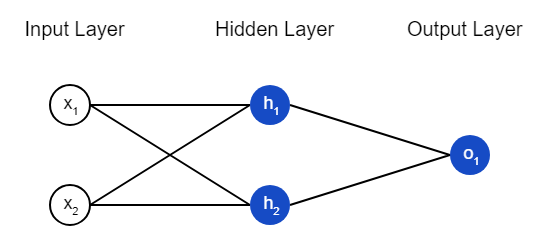

(Based on a notebook by Victor Zhou, Software Engineer: https://victorzhou.com/blog/intro-to-neural-networks/ and https://gist.github.com/vzhou842/986459249c2510da9b5c92bd3f3ca7fb
)



**Activation Functions and Loss Function:** The code defines three functions:

  - **sigmoid(x):** Calculates the sigmoid activation function.
  - **deriv_sigmoid(x):** Calculates the derivative of the sigmoid activation function.
  - **mse_loss(y_true, y_pred):** Calculates the mean squared error loss between true and predicted values.
**Class Definition:** OurNeuralNetwork: This section defines a class called OurNeuralNetwork. The neural network architecture consists of 2 input neurons, a hidden layer with 2 neurons, and an output layer with 1 neuron.

**Initializer __init__:** The __init__ method initializes the weights and biases of the network with random values.

**Feedforward Method feedforward:** The feedforward method computes the output of the neural network given an input x.

**Training Method train:** This method is where the training process happens. It takes input data (data) and corresponding true labels (all_y_trues) for training. The process involves:

  - Looping through epochs.
  - Looping through the training data.
  - Performing a feedforward pass.
  - Calculating partial derivatives using the chain rule.
  - Updating weights and biases using gradient descent.
**Updating Weights and Biases:** Inside the training loop, the code updates weights and biases using gradients calculated during backpropagation. The gradients are computed by applying the chain rule to calculate how much each weight and bias contributed to the loss.

**Printing Loss:** At the end of each epoch, the code calculates the loss by applying the feedforward method on the training data and comparing it to the true labels. It prints the loss every 10 epochs.

In [ ]:
import numpy as np

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  '''
  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

In [ ]:
# Define dataset
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

Epoch 0 loss: 0.593
Epoch 10 loss: 0.483
Epoch 20 loss: 0.399
Epoch 30 loss: 0.275
Epoch 40 loss: 0.133
Epoch 50 loss: 0.098
Epoch 60 loss: 0.079
Epoch 70 loss: 0.066
Epoch 80 loss: 0.056
Epoch 90 loss: 0.048
Epoch 100 loss: 0.042
Epoch 110 loss: 0.037
Epoch 120 loss: 0.033
Epoch 130 loss: 0.030
Epoch 140 loss: 0.027
Epoch 150 loss: 0.025
Epoch 160 loss: 0.023
Epoch 170 loss: 0.021
Epoch 180 loss: 0.019
Epoch 190 loss: 0.018
Epoch 200 loss: 0.017
Epoch 210 loss: 0.016
Epoch 220 loss: 0.015
Epoch 230 loss: 0.014
Epoch 240 loss: 0.013
Epoch 250 loss: 0.013
Epoch 260 loss: 0.012
Epoch 270 loss: 0.011
Epoch 280 loss: 0.011
Epoch 290 loss: 0.010
Epoch 300 loss: 0.010
Epoch 310 loss: 0.010
Epoch 320 loss: 0.009
Epoch 330 loss: 0.009
Epoch 340 loss: 0.009
Epoch 350 loss: 0.008
Epoch 360 loss: 0.008
Epoch 370 loss: 0.008
Epoch 380 loss: 0.007
Epoch 390 loss: 0.007
Epoch 400 loss: 0.007
Epoch 410 loss: 0.007
Epoch 420 loss: 0.007
Epoch 430 loss: 0.006
Epoch 440 loss: 0.006
Epoch 450 loss: 0.006

In [ ]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Emily: 0.967
Frank: 0.039


#### **Exercises 1.3**
Code a neural network with:

        - 3 inputs
        - 2 hidden layers with 3 neurons each
        - an output layer with 1 neuron

Use the dataset defind bellow:

In [ ]:
class Config:
    nn_input_dim = 3  # input layer dimensionality
    nn_output_dim = 2  # output layer dimensionality
    # Gradient descent parameters (I picked these by hand)
    epsilon = 0.01  # learning rate for gradient descent
    reg_lambda = 0.01  # regularization strength

def create_model(X, y, nn_hdim1, nn_hdim2, num_passes=20000, print_loss=False):
    # Initialize the parameters to random values. We need to learn these.
    num_examples = len(X)
    np.random.seed(0)

    # Initialize the weights and biases for the two hidden layers and the output layer
    W1 = np.random.randn(Config.nn_input_dim, nn_hdim1) / np.sqrt(Config.nn_input_dim)
    b1 = np.zeros((1, nn_hdim1))
    W2 = np.random.randn(nn_hdim1, nn_hdim2) / np.sqrt(nn_hdim1)
    b2 = np.zeros((1, nn_hdim2))
    W3 = np.random.randn(nn_hdim2, Config.nn_output_dim) / np.sqrt(nn_hdim2)
    b3 = np.zeros((1, Config.nn_output_dim))

    # This is what we return at the end
    model = {}

    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        a2 = np.tanh(z2)
        z3 = a2.dot(W3) + b3
        exp_scores = np.exp(z3)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta4 = probs
        delta4[range(num_examples), y] -= 1
        dW3 = (a2.T).dot(delta4)
        db3 = np.sum(delta4, axis=0, keepdims=True)
        delta3 = delta4.dot(W3.T) * (1 - np.power(a2, 2))
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms
        dW3 += Config.reg_lambda * W3
        dW2 += Config.reg_lambda * W2
        dW1 += Config.reg_lambda * W1

        # Gradient descent parameter update
        W1 += -Config.epsilon * dW1
        b1 += -Config.epsilon * db1
        W2 += -Config.epsilon * dW2
        b2 += -Config.epsilon * db2
        W3 += -Config.epsilon * dW3
        b3 += -Config.epsilon * db3

        # Assign new parameters to the model
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}

        # Optionally print the loss
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" % (i, calculate_loss(model, X, y)))

    return model

def predict(model, x):
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']

    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    z3 = a2.dot(W3) + b3
    exp_scores = np.exp(z3)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    return np.argmax(probs, axis=1)



In [ ]:
data = np.array([
  [-1, -2, 2],  # Kay
  [23, 5, 1],   # Rose
  [16, 6, 4],   # Roy
  [-14, -5, 3], # Beauty
])

all_y_trues = np.array([
  0,    # Kay
  1,    # Rose
  0,    # Roy
  1,    # Beauty
])


In [ ]:
X =data
y=all_y_trues
model = create_model(X, y, 3,3, print_loss=True)

Loss after iteration 0: 1.179453
Loss after iteration 1000: 1.316520
Loss after iteration 2000: 1.091510
Loss after iteration 3000: 1.022177
Loss after iteration 4000: 0.981948
Loss after iteration 5000: 0.953686
Loss after iteration 6000: 0.931606
Loss after iteration 7000: 0.913010
Loss after iteration 8000: 0.896553
Loss after iteration 9000: 0.853066
Loss after iteration 10000: 0.787360
Loss after iteration 11000: 0.760503
Loss after iteration 12000: 0.740051
Loss after iteration 13000: 0.722278
Loss after iteration 14000: 0.706256
Loss after iteration 15000: 0.691711
Loss after iteration 16000: 0.678491
Loss after iteration 17000: 0.666428
Loss after iteration 18000: 0.655351
Loss after iteration 19000: 0.645119


In [ ]:
# Make some predictions
Thiery = np.array([-1, -3, 2])
Wendy = np.array([24, 4, 1])
print("Thiery: %.3f" % predict(model,Thiery))
print("Wendy: %.3f" % predict(model,Wendy))

Thiery: 2.000
Wendy: 1.000


# Unsupervised Learning

Unsupervised learning is a type of machine learning where the algorithm is given a dataset without explicit labels. The algorithm's goal is to find patterns, structures, or relationships within the data on its own. Since there are no labels to guide the learning process, unsupervised learning is often used for exploratory data analysis and data clustering.

In [ ]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# import dataset
csv_url =  "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
# Training dataset
iris = pd.read_csv(csv_url)

In [ ]:
# Remove the labels/ targets
X = iris.iloc[:, [0, 1, 2, 3]].values

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


The output of this code bellow would be a table that shows the count of occurrences of each species of flowers in the Iris dataset. The table would have two columns: "variety" and "count". Each row would correspond to a different species, and the "count" column would indicate how many times that species appears in the dataset.

In [ ]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["variety"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
variety,
Setosa,50
Versicolor,50
Virginica,50


Andrews curves are a way to visualize multivariate data by mapping each observation to a curve and then plotting these curves.The code bellow generates an Andrews curves plot using the Iris dataset. Andrews curves provide a way to visualize how different classes or categories (in this case, flower species) of a dataset can be distinguished based on the shape of the curves that represent the data points. Each curve is derived from a data point, and the way the curve varies as it moves along its length helps visualize patterns and differences between classes.

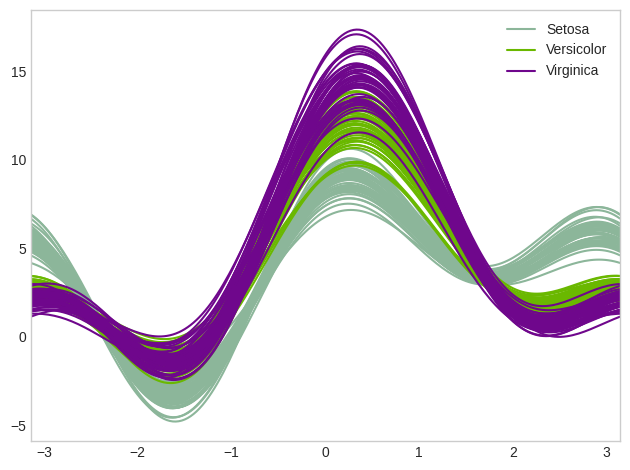

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(iris, "variety")
plt.show()

In [ ]:
iris_setosa=iris.loc[iris["variety"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["variety"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["variety"]=="Iris-versicolor"]

# Distribution Plot

 The code snippet bellow uses Seaborn's FacetGrids and distribution plot functions to create a series of subplots, each displaying the distribution of a specific feature for different species of flowers in the Iris dataset. This type of visualization helps in understanding how the features vary across different species and provides insights into the data distribution and potential patterns.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a dep

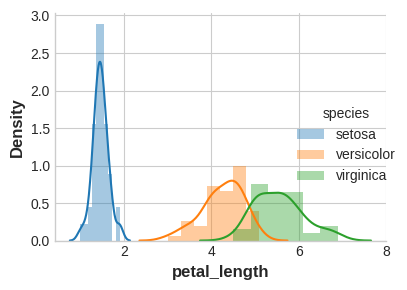

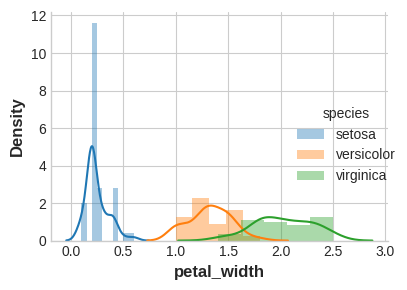

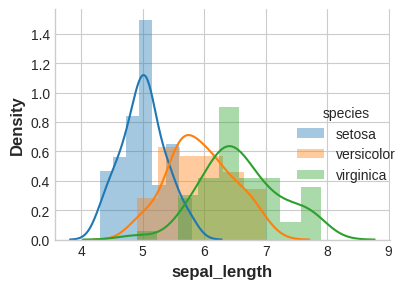

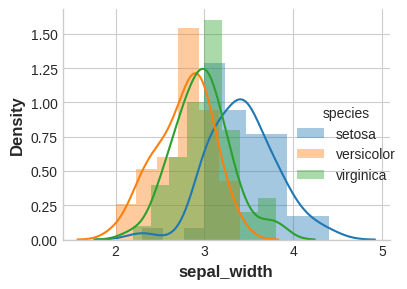

In [ ]:
iris = sns.load_dataset("iris")

# Create FacetGrids
sns.FacetGrid(iris, hue="species", height=3).map(sns.distplot, "petal_length").add_legend()
sns.FacetGrid(iris, hue="species", height=3).map(sns.distplot, "petal_width").add_legend()
sns.FacetGrid(iris, hue="species", height=3).map(sns.distplot, "sepal_length").add_legend()
sns.FacetGrid(iris, hue="species", height=3).map(sns.distplot, "sepal_width").add_legend()

plt.show()

**Histogram:**

  - A histogram is a graphical representation of the distribution of data points in a dataset. It divides the data into "bins" (intervals) and displays the frequency or count of data points falling into each bin.
  - The x-axis of a histogram represents the range of values, divided into bins. The y-axis represents the frequency or count of data points in each bin.
  - Histograms are particularly useful for understanding the frequency distribution and identifying patterns like modes, skewness, and outliers.
  - It provides a discrete view of the data distribution.
  
**Distribution Plot (Density Plot):**

  - A distribution plot, often represented as a density plot, is a smoothed version of a histogram. It displays the estimated probability density function of the data.
  - Unlike a histogram, a distribution plot shows a smooth curve that approximates the underlying distribution of the data. This curve represents the likelihood of a data point occurring in a specific range of values.
  - Distribution plots offer insights into the shape of the distribution, including information about modes, central tendency, and spread.
  - The area under the curve of a distribution plot represents the probability of the data points falling within a particular range.
  - Since distribution plots involve smoothing techniques, they are continuous and provide a more visually appealing and informative representation of the data distribution, especially for larger datasets.

## Box plot

A box plot is a graphical representation that displays the summary of a set of data values. In this case, the x-axis represents the different species of flowers, and the y-axis represents the petal length. The box in the plot shows the interquartile range (IQR) of the data, the median is represented by the line inside the box, and the whiskers extend to the minimum and maximum values within a certain range (usually defined as 1.5 times the IQR).

The box plot provides insights into the distribution, central tendency, and potential outliers in the petal lengths for different species of flowers. It's a useful visualization for comparing distributions between categories

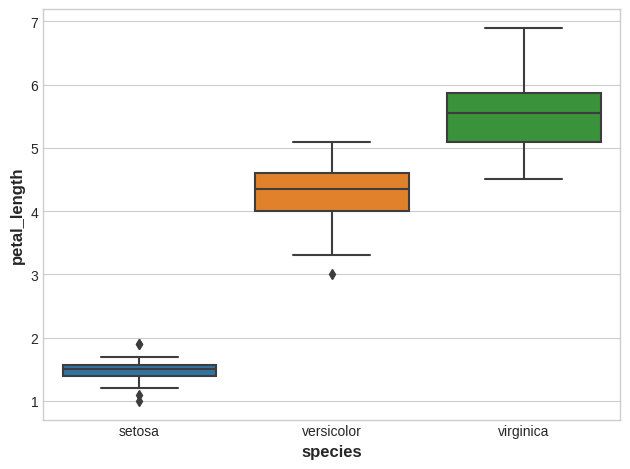

In [ ]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

## Violin Plot

A violin plot is a combination of a box plot and a kernel density plot. It provides insights into the distribution of data across different categories. In this case, the x-axis represents the different species of flowers, and the y-axis represents the petal length. The width of each violin corresponds to the density of data points at different petal lengths. The center line within the violin indicates the median, and the shape of the violin gives a visual representation of the data distribution.

Violin plots are useful for comparing the distribution of a variable across different categories. They can provide more information about the data distribution compared to simple box plots.

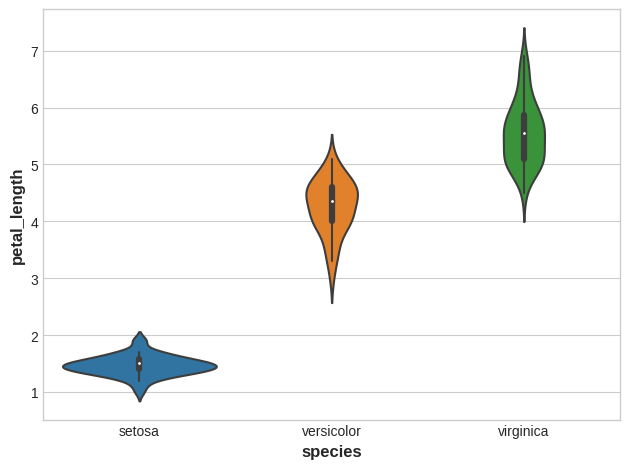

In [ ]:
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()

# Pair Plot

A pair plot is a grid of scatterplots, where each scatterplot shows the relationship between two numerical features. The diagonal of the grid typically contains histograms or kernel density plots to show the distribution of each individual feature.

In this case, the pair plot allows you to visualize the relationships between the numerical features ("sepal_length," "sepal_width," "petal_length," "petal_width") for different species of flowers. The points are color-coded based on species, making it easy to identify patterns and relationships within and across species.

Pair plots are particularly useful for exploring relationships and correlations between multiple features in a dataset.

Pairwise relationships refer to the way two variables or features vary together. It involves visualizing and analyzing the patterns, trends, and associations between pairs of variables. This analysis helps you understand how changes in one variable are related to changes in another variable. Pairwise relationships can be explored through scatter plots, line plots, or other types of visualizations.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



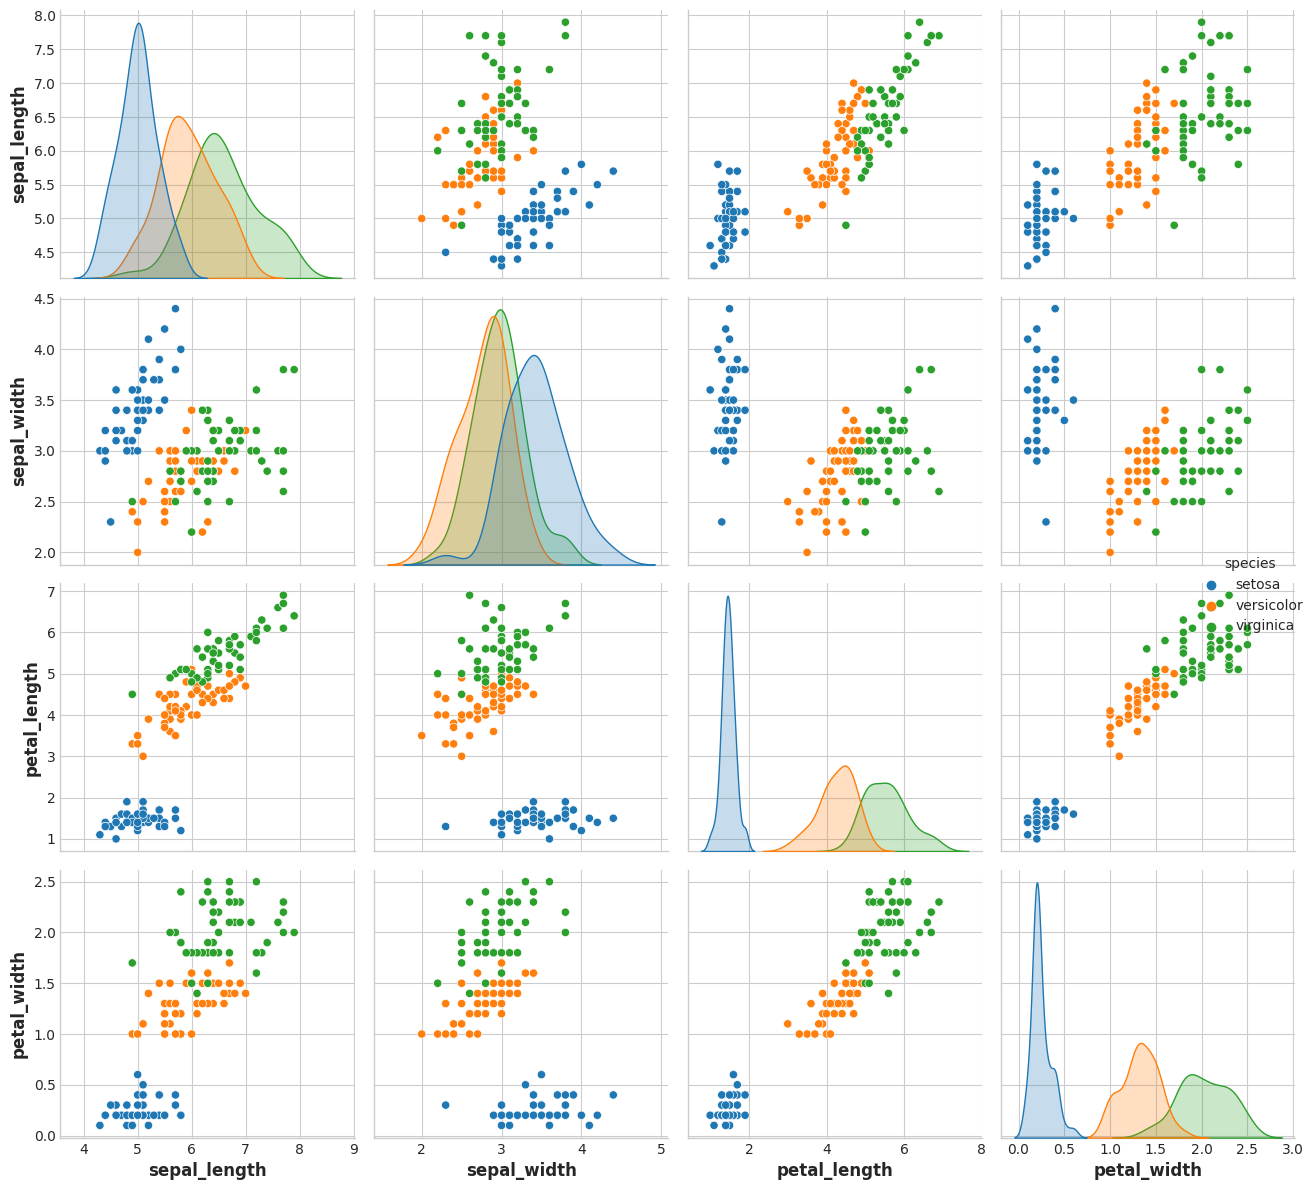

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

This code snippet bellow is used to perform the "elbow method" in order to determine the optimal number of clusters for the KMeans clustering algorithm. KMeans is an unsupervised machine learning algorithm that groups similar data points into clusters based on their features. The "elbow method" is a common technique to choose the appropriate number of clusters for KMeans by identifying an "elbow point" in the plot of within-cluster sum of squares (WCSS) against the number of clusters.

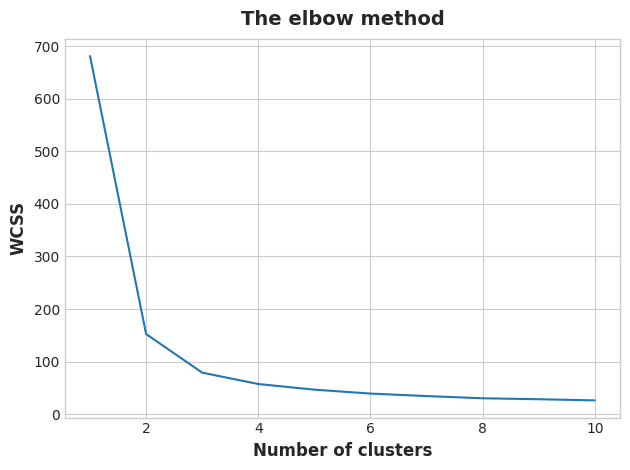

In [ ]:
wcss = [] #within cluster sum of squares

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) # km =kmeans
    km.fit(X)
    wcss.append(km.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
pip install kneed

The snippet of code bellow uses the KneeLocator class from the kneed library to automatically identify the "knee point" or "elbow point" in the plot of within-cluster sum of squares (WCSS) against the number of clusters. The knee point is where the curve in the plot experiences a significant change in slope, indicating the optimal number of clusters for KMeans clustering.

In [ ]:
from kneed import KneeLocator
print('The knee point: (The point is the point of maximum curvature.)')
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print(kl.elbow)

The knee point: (The point is the point of maximum curvature.)
3


The KMeans clustering algorithm is used to group data points into clusters based on their features. The data points will be grouped into three clusters, and the y_km array will contain cluster assignments for each data point. This assignment indicates which cluster each data point belongs to according to the KMeans algorithm.

**km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0):** This line creates a KMeans clustering model (km) with specific parameters:

  - **n_clusters=3:** Specifies the desired number of clusters, which is set to 3 in this case.
  - **init='k-means++':** Specifies the method for initializing cluster centroids. The 'k-means++' initialization is a method that smartly selects the initial centroids to improve convergence.
  - **max_iter=300:** Specifies the maximum number of iterations for the KMeans algorithm in a single run. The algorithm will stop if convergence is achieved before reaching this limit.
  - **n_init=10:** Specifies the number of times the KMeans algorithm will be run with different centroid seeds. The best result will be selected.
  - **random_state=0:** Sets the random seed for the random number generator, ensuring reproducibility of results.
  
**y_km = km.fit_predict(X):** This line performs the KMeans clustering and assigns each data point to a cluster. The fit_predict method combines the fit and predict steps into one. It returns an array y_km where each element indicates the cluster assignment for the corresponding data point.

  - **X:** This represents the dataset that you want to cluster.

In [ ]:
# number of clusters = 3
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# Predict clusters
y_km = km.fit_predict(X)
print(y_km)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


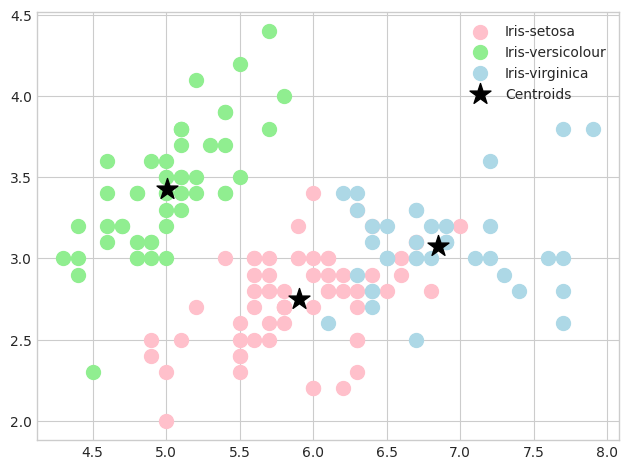

In [ ]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=100, c='pink',
    label='Iris-setosa'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=100, c='lightgreen',
    label='Iris-versicolour'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=100, c='lightblue',
    label='Iris-virginica'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='Centroids'
)
plt.legend()
plt.show()

## 3D Scatterplot

This code snippet bellow creates a 3D scatter plot using Matplotlib to visualize the KMeans clustering results for the Iris dataset. It displays the clustered data points and the centroids of the clusters in a three-dimensional space.

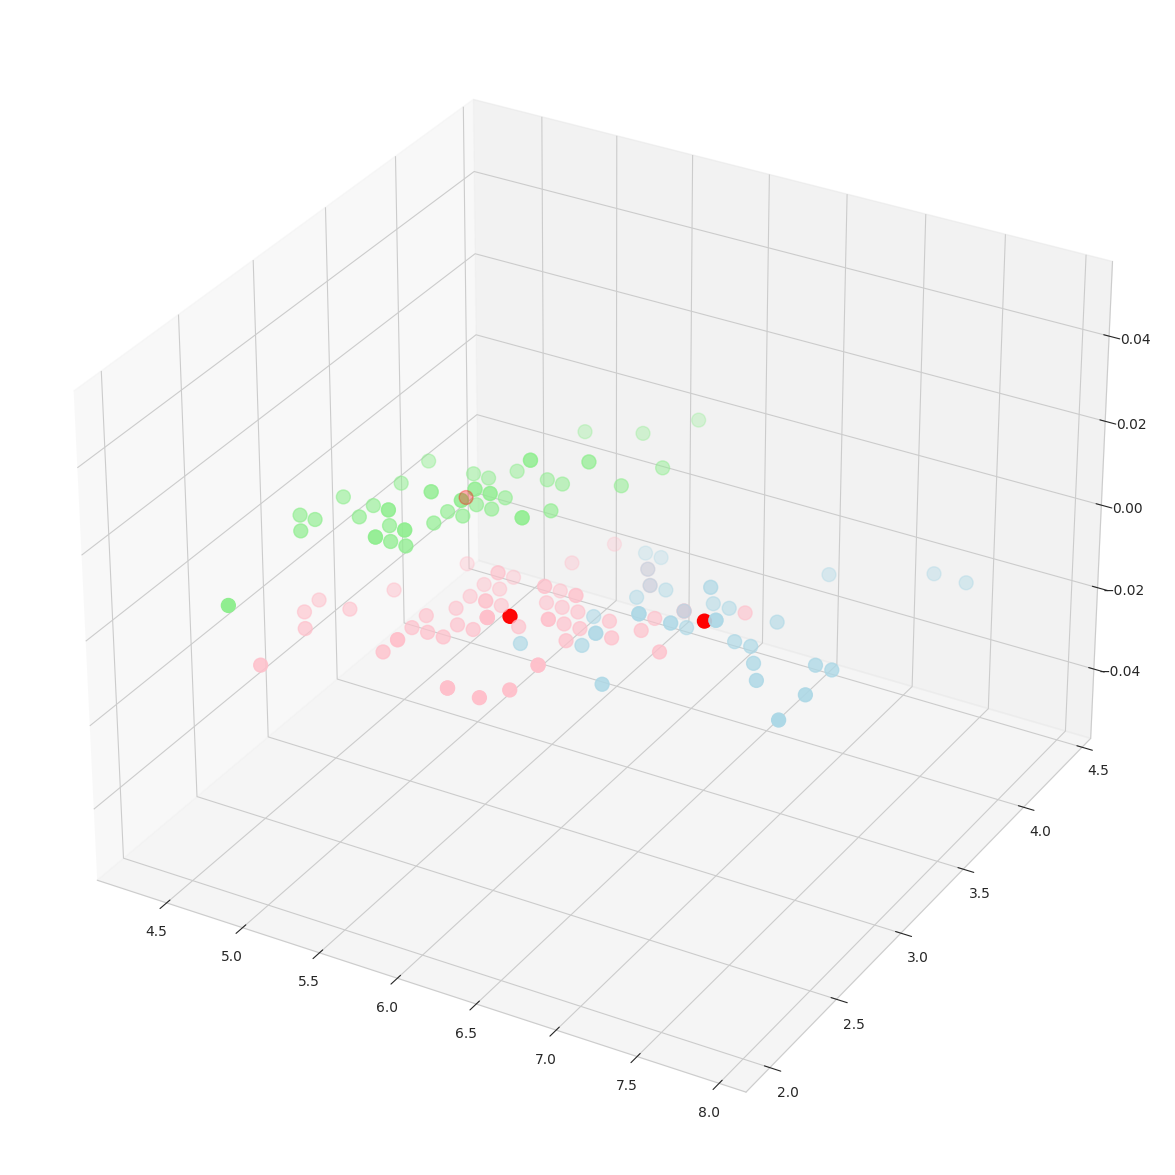

In [ ]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 100, c = 'lightgreen', label = 'Iris-versicolour')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 100, c = 'lightblue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

#### **Exercises 1.4**

Cluster the dataset using K-means clustering:

https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

<ipython-input-236-a661f1a633a2>:6: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



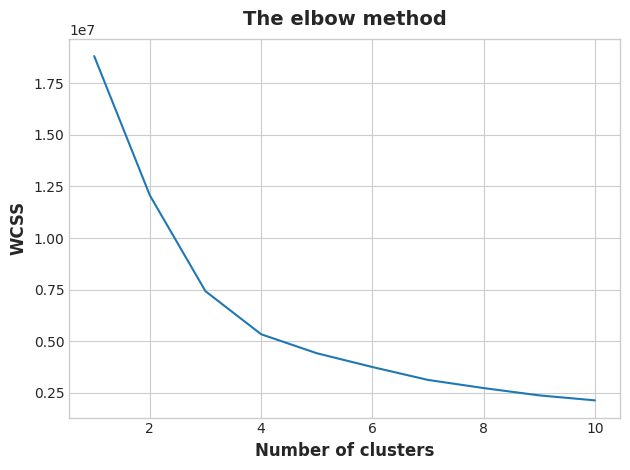

In [ ]:
# number of clusters = 3
wcss = [] #within cluster sum of squares

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) # km =kmeans
    km.fit(data)
    wcss.append(km.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from kneed import KneeLocator
print('The knee point: (The point is the point of maximum curvature.)')
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print(kl.elbow)

The knee point: (The point is the point of maximum curvature.)
4


In [ ]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# Predict clusters
y_km = km.fit_predict(data)


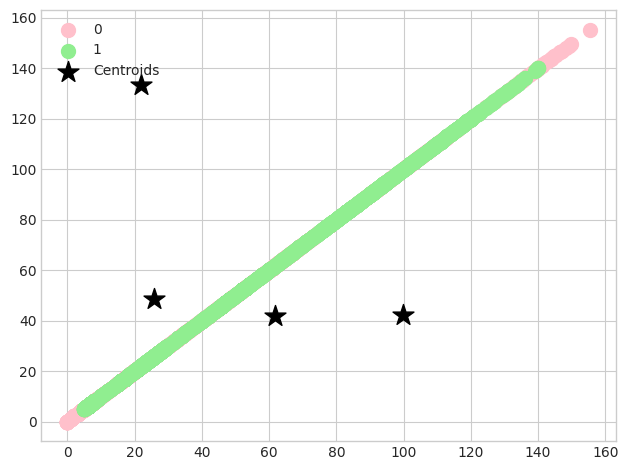

In [ ]:
plt.scatter(
    data[y_km == 0], data[y_km == 0],
    s=100, c='pink',
    label='0'
)

plt.scatter(
    data[y_km == 1], data[y_km == 1],
    s=100, c='lightgreen',
    label='1'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='Centroids'
)
plt.legend()
plt.show()